# 🌸 Iris Flower Species Classification using Logistic Regression (OvO Approach)

You are working as a data scientist for a botanical research organization that aims to automate the classification of Iris flower species based on measurable features. The classification task is critical for accelerating large-scale taxonomy, where manual identification is time-consuming and error-prone.

Using the Iris Flower Dataset, your objective is to build a multiclass classification model that predicts the species of a flower based on four numerical features: sepal length, sepal width, petal length, and petal width. You will train a Logistic Regression model using the One-vs-One (OvO) strategy, where a separate binary classifier is trained for each pair of flower species. The final class prediction will be made using a majority voting mechanism across these binary classifiers.

This project not only demonstrates the application of logistic regression in a multiclass setting but also introduces you to one of the earliest and most iconic datasets in pattern recognition and machine learning.
<hr>

## 📊 Dataset Details

- **Source:** Kaggle - Iris Dataset

Originally introduced by R.A. Fisher (1936) in his paper “The Use of Multiple Measurements in Taxonomic Problems”.
Also hosted by the UCI Machine Learning Repository.

- **Features:**
    - `SepalLengthCm`: Length of the sepal in centimeters
    - `SepalWidthCm`: Width of the sepal in centimeters
    - `PetalLengthCm`: Length of the petal in centimeters
    - `PetalWidthCm`: Width of the petal in centimeters
<br><br>

- **Target:**
    - **Species:** Categorical label with three possible values:
        - Iris-setosa
        - Iris-versicolor
        - Iris-virginica

- **Size:**
    - 150 entries
    - 4 numeric features
    - 1 categorical target variable

## Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

## Laoding and Exploring data

In [2]:
iris = pd.read_csv("./iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning dataset

Droping `id` from the dataset

In [5]:
iris.drop('Id', axis=1, inplace=True)

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualise data

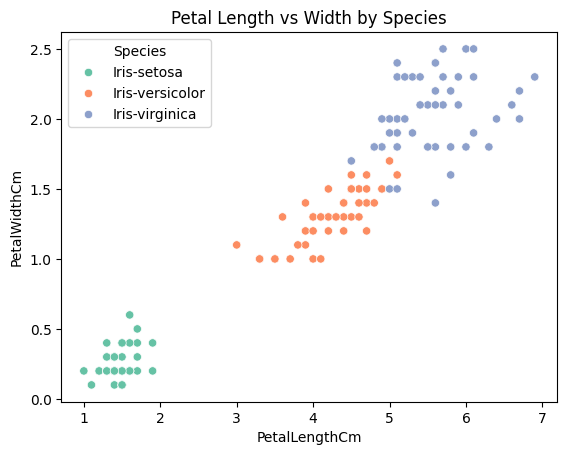

In [7]:
sns.scatterplot(
    data=iris, 
    x='PetalLengthCm', 
    y='PetalWidthCm', 
    hue='Species', 
    palette='Set2'
)
plt.title('Petal Length vs Width by Species')
plt.show()

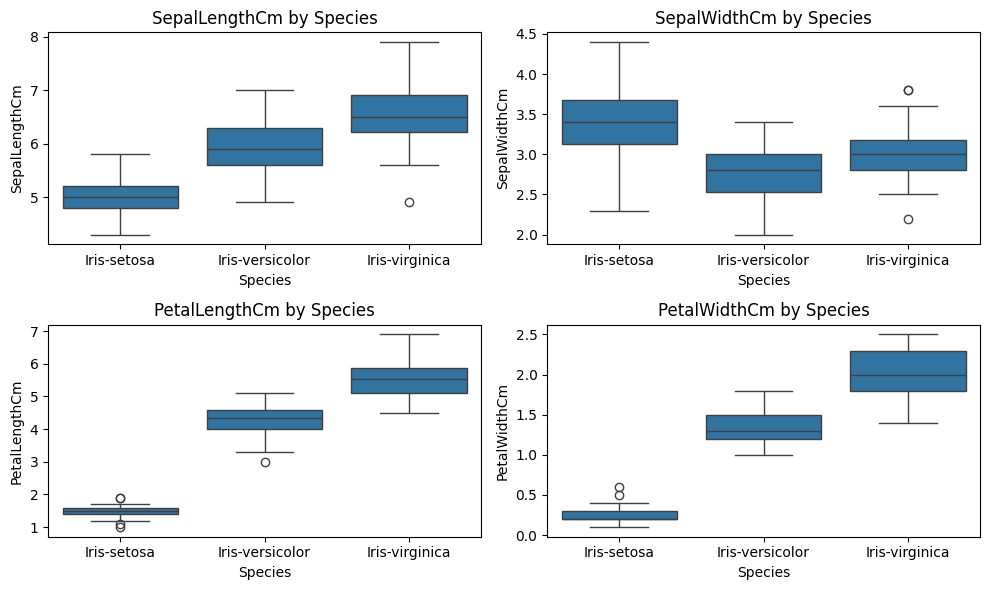

In [8]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=iris, x='Species', y=column)
    plt.title(f'{column} by Species')
plt.tight_layout()
plt.show()

**Observations:**

- **PetalLengthCm and PetalWidthCm:**
    - These two are super discriminative. Iris-setosa is completely separated from the others.
    - Iris-virginica tends to have the largest petals, while setosa has the smallest.
    - These features will be very helpful for classification!
<br><br>
- **SepalLengthCm:**
    - There’s some overlap between versicolor and virginica.
    - Setosa still shows a distinct range.
<br><br>
- **SepalWidthCm:**
    - The most overlapping feature. Not very useful for separating classes by itself.

## Pre-processing data

### spliting target from data

In [9]:
X = iris.drop("Species", axis=1)
y = iris["Species"]

### label Encoding

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### Spliting data into test and train

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


### Standardise features

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Logistic Regression with OVO

In [13]:
model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
model.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))

In [14]:
y_pred = model.predict(X_test_scaled)

In [15]:
# Use inverse-transform the scaled version:
X_test_unscaled = scaler.inverse_transform(X_test)

# Create a DataFrame from it for clarity
X_test_unscaled = pd.DataFrame(X_test_unscaled, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# Create comparison DataFrame
results = pd.DataFrame({
    "SepalLengthCm": X_test_unscaled["SepalLengthCm"].values,
    "SepalWidthCm": X_test_unscaled["SepalWidthCm"].values,
    "PetalLengthCm": X_test_unscaled["PetalLengthCm"].values,
    "PetalWidthCm": X_test_unscaled["PetalWidthCm"].values,
    "Actual Species": y_test,
    "Predicted Species": y_pred
})

# Decode back to species names
results["Actual Species"] = le.inverse_transform(results["Actual Species"])
results["Predicted Species"] = le.inverse_transform(results["Predicted Species"])

results.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual Species,Predicted Species
0,9.526293,4.375592,6.058882,1.356294,Iris-setosa,Iris-setosa
1,10.949898,4.375592,12.395018,2.573310,Iris-virginica,Iris-virginica
2,9.945000,4.109307,9.578958,1.964802,Iris-versicolor,Iris-versicolor
3,10.028742,4.064926,9.578958,1.964802,Iris-versicolor,Iris-versicolor
4,9.526293,4.464354,6.058882,1.356294,Iris-setosa,Iris-setosa
5,11.117381,4.508735,12.043010,2.421183,Iris-versicolor,Iris-virginica
6,9.693776,4.641877,5.530871,1.356294,Iris-setosa,Iris-setosa
7,10.363708,4.553116,6.762897,1.356294,Iris-setosa,Iris-setosa
8,11.284864,4.375592,12.923029,2.725437,Iris-virginica,Iris-virginica
9,10.363708,4.375592,11.691003,2.345120,Iris-versicolor,Iris-versicolor


## Evaluation

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (using macro average for multiclass)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print("Confusion Matrix:\n", conf_matrix, end="\n\n")
print("Accuracy:", round(accuracy, 4))
print("Precision (macro):", round(precision, 4))
print("Recall (macro):", round(recall, 4))
print("F1 Score (macro):", round(f1, 4))

Confusion Matrix:
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]

Accuracy: 0.9
Precision (macro): 0.9024
Recall (macro): 0.9
F1 Score (macro): 0.8997


**Observation:**

The model performs **very well overall**, with a **90% accuracy** on the test set. Here's a breakdown:
- **Iris-setosa** was classified **perfectly** — all 10 test samples were predicted correctly.
- **Iris-versicolor** had **2 misclassifications**, where they were wrongly predicted as Iris-virginica.
- **Iris-virginica** had **1 misclassification**, also predicted as Iris-versicolor.

Despite these few errors, the **macro-averaged precision, recall**, and **F1 scores** are all **around 0.9**, which shows the model is balanced across all classes and not **biased** toward any particular class.

## Visualize Decision Boundaries

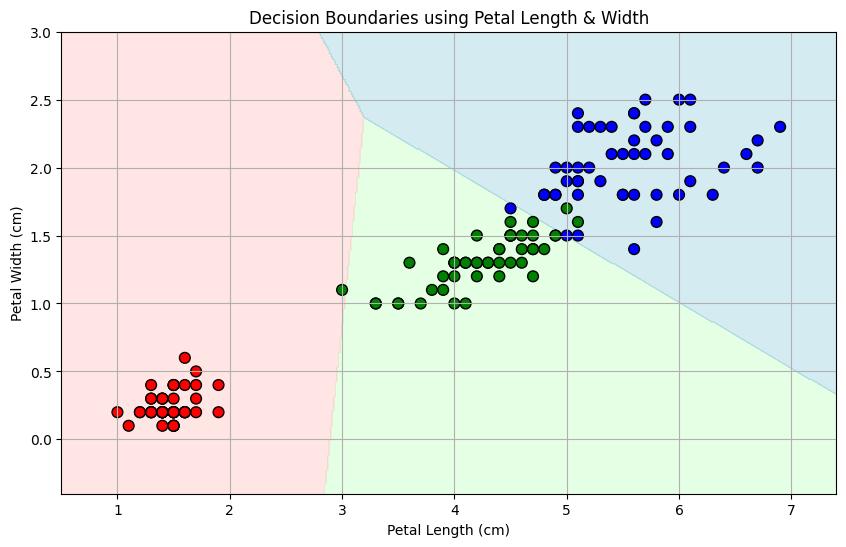

In [19]:
from matplotlib.colors import ListedColormap

# Select only the 2 features
X_two_features = iris[["PetalLengthCm", "PetalWidthCm"]].values
y = iris["Species"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train a new logistic regression model on these 2 features
model_2d = LogisticRegression(multi_class="ovr", max_iter=200)
model_2d.fit(X_two_features, y_encoded)

# Define colors
cmap_background = ListedColormap(["#ffcccb", "#ccffcc", "#add8e6"])  # Light Red, Light Green, Light Blue
cmap_points = ListedColormap(["#ff0000", "#008000", "#0000ff"])      # Red, Green, Blue

# Create meshgrid
x_min, x_max = X_two_features[:, 0].min() - 0.5, X_two_features[:, 0].max() + 0.5
y_min, y_max = X_two_features[:, 1].min() - 0.5, X_two_features[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y_encoded, cmap=cmap_points, edgecolor="k", s=60)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Boundaries using Petal Length & Width")
plt.grid(True)
plt.show()


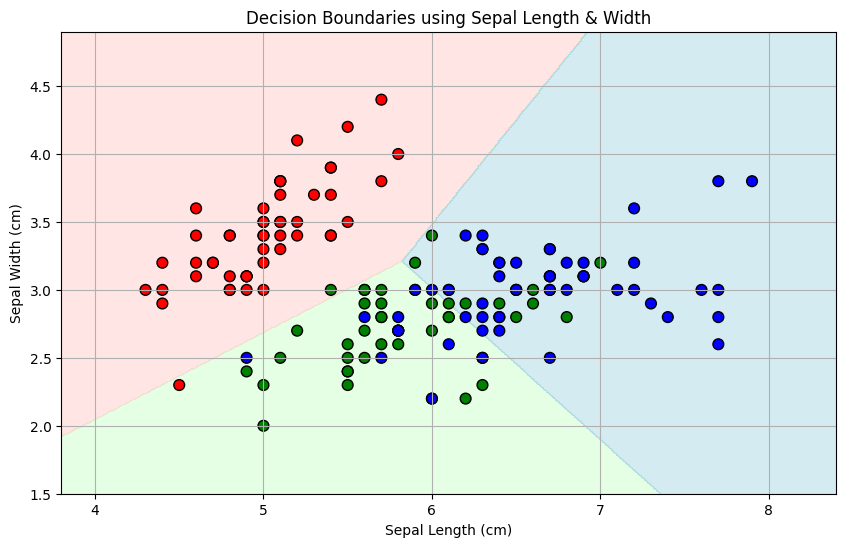

In [21]:
# Use SepalLengthCm and SepalWidthCm
X_two_features = iris[["SepalLengthCm", "SepalWidthCm"]].values
y = iris["Species"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train a new logistic regression model
model_2d = LogisticRegression(multi_class="ovr", max_iter=200)
model_2d.fit(X_two_features, y_encoded)

# Define color maps
cmap_background = ListedColormap(["#ffcccb", "#ccffcc", "#add8e6"])  # Light Red, Light Green, Light Blue
cmap_points = ListedColormap(["#ff0000", "#008000", "#0000ff"])      # Red, Green, Blue

# Create meshgrid
x_min, x_max = X_two_features[:, 0].min() - 0.5, X_two_features[:, 0].max() + 0.5
y_min, y_max = X_two_features[:, 1].min() - 0.5, X_two_features[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y_encoded, cmap=cmap_points, edgecolor="k", s=60)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Decision Boundaries using Sepal Length & Width")
plt.grid(True)
plt.show()

## Conclusion

As a data scientist for a botanical research organization, you successfully developed a **multiclass classification model** to automate the identification of *Iris* flower species. Using the **Iris Flower Dataset**, a logistic regression model with the **One-vs-One (OvO)** strategy was trained on four key features: **sepal length, sepal width, petal length, and petal width**.

The model achieved impressive results:

- **Accuracy:** 90%
- **Precision (macro):** 0.9024  
- **Recall (macro):** 0.9  
- **F1 Score (macro):** 0.8997  

The **confusion matrix** showed that:

- *Iris-setosa* was **perfectly classified**.  
- *Iris-versicolor* and *Iris-virginica* had **minor misclassifications**, with 3 misclassified samples between them.

These results confirm that logistic regression, even as a simple linear model, can perform exceptionally well on well-separated data like the Iris dataset. The automated classification system built here can now assist botanists in **rapid and accurate species identification**, reducing manual effort and potential errors in field research.

This project not only highlights the practical use of **Logistic Regression in multiclass classification** but also serves as a stepping stone toward more complex models and real-world deployment in scientific domains.

# Author: Rohan Das

**Junior Engineer at CloudxLab | Alumni of Vivekananda Global University**

*Jaipur, Rajasthan, India*  
📧 Email: [rd555217@gmail.com](mailto:rd555217@gmail.com)  
💻 GitHub: [ROHANDAS2003](https://github.com/ROHANDAS2003)  
🌐 Portfolio: [rohandas2003.com](https://www.rohandas2003.com/)<br>
🌳 Linktree: [mr_RohanDas](https://linktr.ee/mr_RohanDas)

<img src="https://ugc.production.linktr.ee/f9907aa7-25b0-4295-87cb-e88460e512ce_myimage1.png?io=true&size=avatar-v3_0" width="200" height="200" alt="Rohan Das">

---

## About Me

Hello! I'm Rohan Das, a passionate AI & ML enthusiast, Python developer, and full-stack web developer. With a strong foundation in computer applications and hands-on experience in various technologies, I am committed to continuous learning and innovation.

---

## Skills

- **Programming Languages:** ML Basic, Python, SQL, Full-stack web development  
- **Frameworks & Libraries:** Django, Numpy, Pandas, Matplotlib  
- **Tools & Platforms:** Linux, Git, GitHub  

---

## Let's Connect

I'm always open to new opportunities and collaborations. Feel free to reach out to me via email or connect with me on LinkedIn.

[![LinkedIn](https://img.shields.io/badge/LinkedIn-RohanDas-blue)](https://www.linkedin.com/in/mr-rohandas/)

---

*Last updated: April 6, 2025*
